# 2.0 Investigating and Visualising Real Datasets

In this notebook we have a look at some datasets and learn how to perform data visualisation in python-

The outline is the following:
- 2.0.1 Diabetes dataset
- 2.0.2 Missing Values
- 2.0.3 Computing summary statistics
- 2.0.4 Load a Second Datast (Wine)
- 2.0.5 Dataset normalisation
- 2.0.6 Visualisation
- 2.0.7 Kernel Density Estimation
- 2.0.8 Correlation
- 2.0.9 PCA
- 2.0.10 t-SNE

## 2.0.1 Diabetes dataset

The diabetes dataset is available in the scikit learn (sklearn) package. 
- First let's load the dataset. 

In [5]:
from sklearn.datasets import load_diabetes

In [6]:
dataset = load_diabetes()

Let us have a look at the dataset

In [8]:
print(type(dataset))
dataset

<class 'sklearn.utils._bunch.Bunch'>


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

It is not suggested to print a whole dataset to check what is it. It could be too big to be printed in a notebook cell and you could be forced to restart the kernel. 

- let's check the keys

In [10]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

- let's look at the values and shapes of the data

In [16]:
type(dataset['data'])

numpy.ndarray

In [18]:
dataset['data'].shape

(442, 10)

In [20]:
dataset['data'] is dataset.data

True

- What does the data represent?

In [23]:
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- finally, what is the target?  The target is a quantitative measure of disease progression one year after baseline

In [26]:
type(dataset.target)

numpy.ndarray

In [28]:
dataset.target.shape

(442,)

- Let's look at the full description

In [31]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## 2.0.2 Missing Values

Let's search for missing values. There are multiple ways to do it, this is an example

In [35]:
import numpy as np

In [37]:
MV = np.isnan(dataset.data)
print(MV) #vettore con true se valore nullo, con false se valore "normale"
unique, counts = np.unique(MV, return_counts=True) # restituisce conta e nome dei valori presenti nell'array
unique, counts

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


(array([False]), array([4420], dtype=int64))

No missing values! It will not always be like this. 

Let's introduce a missing value by replacing the value in [10,7] with a NAN

In [39]:
dataset.data[:, 7]

array([-0.00259226, -0.03949338, -0.00259226,  0.03430886, -0.00259226,
       -0.0763945 , -0.03949338,  0.01770335, -0.00259226, -0.00259226,
       -0.0763945 ,  0.07120998, -0.03949338, -0.00259226, -0.03949338,
        0.1081111 , -0.03949338,  0.03430886, -0.00259226, -0.03949338,
       -0.03949338, -0.03949338, -0.03949338,  0.07120998, -0.00259226,
        0.03430886, -0.0763945 , -0.03949338, -0.03949338, -0.0763945 ,
       -0.03949338, -0.0763945 ,  0.1081111 , -0.0763945 , -0.03949338,
       -0.05351581, -0.03949338, -0.03949338,  0.07120998, -0.00259226,
        0.03430886, -0.03949338,  0.0158583 , -0.0763945 ,  0.07120998,
       -0.00259226, -0.03949338, -0.03949338, -0.03949338,  0.07120998,
       -0.03949338, -0.00259226, -0.00259226, -0.00259226, -0.03949338,
       -0.03949338,  0.00294291, -0.0763945 , -0.0763945 , -0.00259226,
       -0.0763945 ,  0.07120998, -0.03949338, -0.00259226, -0.03949338,
        0.07120998,  0.07120998, -0.00185424, -0.00259226, -0.03

In [41]:
dataset.data[10,7] = np.nan #introduce valore 'nan'

In [43]:
dataset.data[10,7]

nan

In [45]:
MV = np.isnan(dataset.data)
unique, counts = np.unique(MV, return_counts=True)
unique, counts

(array([False,  True]), array([4419,    1], dtype=int64))

Different types of missing value:

In [47]:
MV = dataset.data == None # MODO per vedere se è presente il missing value 'None' o qualunque altro missing value si voglia trovare 
unique, counts = np.unique(MV, return_counts=True)
unique, counts

(array([False]), array([4420], dtype=int64))

Ok, now we have one, how do we find where is it?

In [51]:
np.argwhere(np.isnan(dataset.data)) #modo per individuare la posizione del missing value

array([[10,  7]], dtype=int64)

Let's replace the missing value with the average (run over the dataset and check if missing, then replace)

In [53]:
np.mean(dataset.data, axis=0)[7]

nan

The mean does not work, don't worry! The mean of an array containing nan values can be still computed using np.nanmean, which ignores nan values

In [55]:
np.nanmean(dataset.data, axis=0)[7], np.nanmean(dataset.data[:, 7])

(0.00017323016723354897, 0.0001732301672335581)

In [57]:
dataset.data[10,7] = np.nanmean(dataset.data[:, 7])

In [59]:
MV = np.isnan(dataset.data)
unique, counts = np.unique(MV, return_counts=True)
unique, counts

(array([False]), array([4420], dtype=int64))

## 2.0.3 Computing summary statistics

Given a dataset, a useful prelimiary operation is computing basic statistic on it.

In [ ]:
dataset = load_diabetes()

In [ ]:
d = dataset.data.copy()

In [ ]:
d.shape

### 2.0.3.1 Mean, Median, STD and MAD

First, we load from library scipy.stats the command to compute the median absolute deviation, which is computed as the mean absolute difference of all elements in the dataset from the median value

In [ ]:
from scipy.stats import median_abs_deviation

In [ ]:
x = np.random.rand(1000)
x.mean(), np.median(x)

In [ ]:
x.std(), median_abs_deviation(x, scale=1)

In [ ]:
x[0] = 345.6
x.mean(), np.median(x)

In [ ]:
x.std(), median_abs_deviation(x, scale=1)

We want to compute the statistics for all features in the dataset. First, we define a function that returns the main statistics given an array:

In [ ]:
def statistics(variable):
    stats = {}
    stats['mean'] = variable.mean()
    stats['std'] = variable.std()
    stats['max'] = variable.max()
    stats['min'] = variable.min()
    stats['median'] = np.median(variable)
    stats['25%'] = np.percentile(variable,25)
    stats['75%'] = np.percentile(variable,75)
    stats['mad'] = median_abs_deviation(variable)
    return stats

Then, we define a function which iterates over the dataset features and computes the statistics for each feature:

In [ ]:
def summarize(data, feature_names):
    summary = {}
    for i,f in enumerate(feature_names):
        summary[f] = statistics(data[:,i])
    return summary

In [ ]:
summary = summarize(dataset.data,dataset.feature_names)

In [ ]:
summary

We can inspect the dataset summary by specifying the statistic desired on specific feature f as:

summary['feature','statistic']

In [ ]:
summary['bmi']['mean']

A fundamental library for plotting data is matplotlib:

In [ ]:
import matplotlib.pyplot as plt

Now, we want to display the dataset features and their distibution in a boxplot

In [ ]:
plt.figure(figsize=(14, 6))
plt.boxplot(dataset.data, tick_labels=dataset.feature_names)
plt.show()

## 2.0.4 Load a Second Datast (Wine)

Let's load a second dataset ...

In [ ]:
from sklearn.datasets import load_wine
dataset2 = load_wine()
dataset2

In [ ]:
summary = summarize(dataset2.data,dataset2.feature_names)

In [ ]:
plt.figure(figsize=(14, 6))
plt.boxplot(dataset2.data, tick_labels=dataset2.feature_names)
plt.tick_params(axis='x', labelsize=10, labelrotation = 60)
plt.show()

  NOTE that this second dataset has columns with differing scales and so makes much more sense to show for the normalisation part of the course ... 

## 2.0.5 Dataset normalisation

### 2.0.5.1 Range Normalization of data

It is useful to define a function which computes the range normalization of data:

$x' = \frac{x-min}{max-min}$

In [ ]:
def range_normalization(data):
    """
       Applies range normalization to the data
       and returns a copy of the data that have
       been normalized
       
       new value = (value-minimum)/(maximum-minimum)
       
    """
    # copy the data not to modify them
    ndata = data.copy()
    
    cols = ndata.shape[1]
    
    for i in range(cols):
        minimum = data[:,i].min()
        maximum = data[:,i].max()
        
        ndata[:,i] = (data[:,i] - minimum)/(maximum-minimum)
    
    return ndata

In [ ]:
def range_normalization2(X):
    """
       Applies range normalization to the data
       and returns a copy of the data that have
       been normalized
       
       new value = (value-minimum)/(maximum-minimum)
       
    """    
    return (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

After range normalization, what is the range of the data?

In [ ]:
a = np.array([ [1.,2.], [3.,4.], [5.,6.] ] )
a

In [ ]:
range_normalization(a), range_normalization2(a)

In [ ]:
help(range_normalization)

### 2.0.5.1 zScore normalization (aka standardization)

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1:

$x' = \frac{x-\mu}{\sigma}$

In [ ]:
def zscore_normalization(data):
    
    """
       Applies zscore normalization to the data
       and returns a copy of the data that have
       been normalized
       
       new value = (value-mean)/standard_deviation
       
    """

    
    ndata = data.copy()
    
    cols = data.shape[1]
    
    for i in range(cols):
        mean = data[:,i].mean()
        std = data[:,i].std()
        ndata[:,i] = (data[:,i]-mean)/std
        
    return ndata

In [ ]:
def zscore_normalization2(X):
    
    """
       Applies zscore normalization to the data
       and returns a copy of the data that have
       been normalized
       
       new value = (value-mean)/standard_deviation
       
    """
    
    return (X-X.mean(axis=0))/X.std(axis=0)

In [ ]:
zscore_normalization(a), zscore_normalization2(a)

We compare the range normalization vs the zScore normalization and visualize it:

In [ ]:
plt.figure(figsize=(14, 6))
plt.boxplot(range_normalization(dataset2.data), tick_labels=dataset2.feature_names)
plt.tick_params(axis='x', labelsize=10, labelrotation = 60)
plt.show()

In [ ]:
plt.figure(figsize=(14, 6))
bp = plt.boxplot(zscore_normalization(dataset2.data), tick_labels=dataset2.feature_names)
plt.tick_params(axis='x', labelsize=10, labelrotation = 60)
plt.show()

In [ ]:
zscore_normalization(dataset2.data).mean(axis=0), zscore_normalization(dataset2.data).std(axis=0)

## 2.0.6 Visualisation

Visualizing data is of paramount importance when inspecting data

### 2.0.6.1 Scatter plot
We can check for correlations by visually inspecting scatter plots between variables

In [ ]:
diabetes = load_diabetes()
wine = load_wine()

We can check the one-to-one variable correlation by single plotting one variable against another:

In [ ]:
plt.scatter(wine.data[:,1], wine['target'])
plt.xlabel(wine.feature_names[1])
plt.ylabel('target')
plt.show()

In [ ]:
plt.scatter(wine.data[:,5], wine.data[:,8])
# plt.axis([0,50,0,20])
plt.xlabel(wine.feature_names[5])
plt.ylabel(wine.feature_names[8])
plt.show()

In [ ]:
plt.scatter(wine.data[:,0], wine.data[:,7],marker='x', s=10, alpha=.5)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[7])
plt.show()

### 2.0.6.2 Histogram

In [ ]:
zdata = zscore_normalization(wine.data)
rdata = range_normalization(wine.data)

In [ ]:
plt.hist(zdata[:,2], bins=10)

The basic histogram is a bit ugly, let's clean it up a little and add titles/labels to it:

In [ ]:
plt.hist(zdata[:,2], bins=10,color='lightgrey',align='mid',width=0.3)
plt.title("Wine dataset -- standardized")
plt.xlabel(wine.feature_names[2])
plt.ylabel("Count")

### 2.0.6.3 Pairplot
We can be interested to visualize pairwise relationships in a dataset. Here it becomes useful the pairplot

In [ ]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(zdata)

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

In [ ]:
sns.pairplot(df)

In [ ]:
df[2].plot.hist(density=True)

## 2.0.7 Kernel Density Estimation
We may be interested in estimate the probability density function (PDF). Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels.

We can display a curve that describe the data distribution:
- Density estimates calculated using kernel-density estimation
- place kernel function (Gaussian density) over each observed datapoint
- curve is average over individual kernels

The kernel bandwidth, h, determines how smooth the estimate is
- large bandwidth results in smooth curve, small one produces bumpy curve
- best value determined by cross-validation (prediction performance on heldout data)

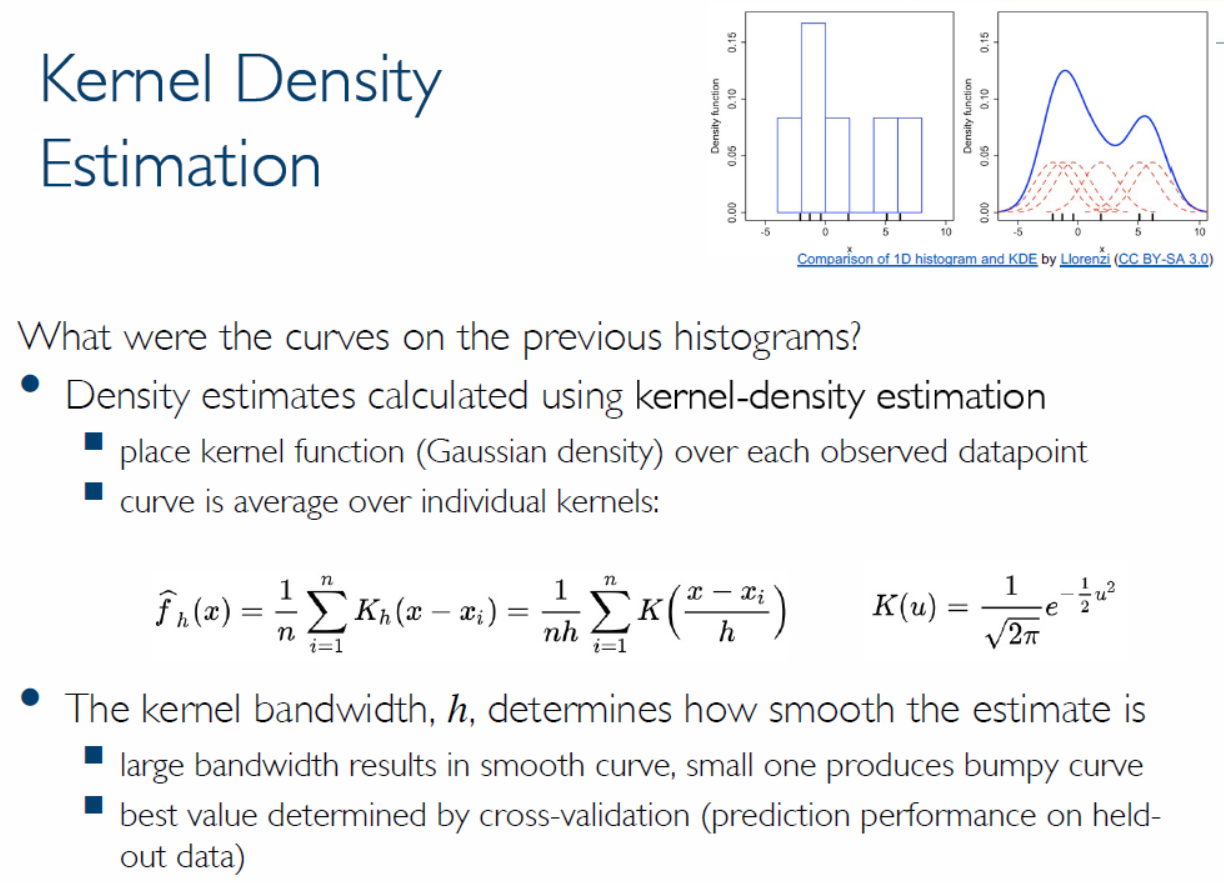

In [ ]:
df[2].plot.kde()

Draw a box plot to show distributions with respect to categories:

In [ ]:
sns.boxplot(data = df)

## 2.0.8 Correlation

Correlation matrix is another useful instrument to understand correlation among variables in a dataset.
First, we build the correlation matrix:

In [ ]:
corrMatrix = df.corr(method='pearson')
corrMatrix

However, the correlation matrix is quite hard to read.

Therefore, we want to visualize it using an heatmat, so that it becomes more readable:

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, ax=ax, vmin=-1)

In statistics, the Pearson correlation coefficient is a measure of linear correlation between two sets of data:

![equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f)

In [ ]:
def PearsonsCorr(x, y):
    num = ((x-x.mean())*(y-y.mean())).sum()
    den1 = ((x-x.mean())**2).sum()
    den2 = ((y-y.mean())**2).sum()
    return num/np.sqrt(den1*den2)

In [ ]:
x = df[1].values
y = df[2].values

In [ ]:
PearsonsCorr(x, y)

Library scipy.stats already has a built-in function to compute Paerson correlation coefficients:

In [ ]:
from scipy.stats import pearsonr
pearsonr(df[1].values, df[2].values)

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

#### 2.0.8.1 Chi-squared statistic

YOU CAN'T COMPUTE PEARSON'S CORRELATION COEFFICIENT BETWEEN CATEGORICAL VARIABLES!
(even if they are expressed with numerical indexes..)

Use chi-square:

$$\chi^2=\sum_{i=1}^{n}\frac{(O_i-E_i)^2}{E_i}$$

[chi2 from scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

The chi-squared test is a widely used statistical test that is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categorical variables. In other words, it is a test of independence between two categorical variables.

Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence;

**Reminder**: In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.

In [ ]:
from scipy import stats

# Observed frequencies
observed_frequencies = [25, 30, 20, 15, 10]

# Expected frequencies
expected_frequencies = [20, 20, 20, 20, 20]

# Perform the chi-squared test
chi2, p = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)
print("p-value:", p)

Let us now consider a second example:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
# create a dataset
data = [['regional', 'sunny', 'milano'], 
       ['regional',  'sunny', 'torino'],
       ['intercity', 'sunny', 'roma'],
       ['intercity', 'cloudy', 'milano'],
       ['intercity', 'cloudy', 'torino'],
       ['intercity', 'cloudy', 'roma']]
columns = ['train_type', 'weather', 'train_station']

df = pd.DataFrame(data, columns=columns)
df

In [ ]:
# Contingency table
CT = pd.crosstab(df['train_type'], df['weather'])
CT

Let's do this manually to understand better how it is computed

In [ ]:
# calculate margins 
m1 = CT.values.sum(axis=0)
m2 = CT.values.sum(axis=1).reshape(-1, 1)
m1, m2

In [ ]:
# Calculate expected values
E = np.multiply(m1, m2)/CT.values.sum()
E

In [ ]:
# Use the equation to obtain the test statistic
chi_2 = (((CT-E)**2)/E).sum().sum()
chi_2

In [ ]:
# now use the cumulative distribution function of the chi2 to obtain the p-value
# we need the degrees of freedom (see doc)
print(CT.size)
dof = CT.size-sum(CT.shape)+CT.ndim-1
dof

In [ ]:
# now calculate the p-value # p-value: probability of hypothesis that 2 categorical variables are independent
1-chi2.cdf(chi_2, dof)

## 2.0.9 PCA

The Principal Component Analysis is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest. It consists in perforing SVD on a dataset, retain the largest N Singular Values, (setting the remaining to zero) and reproject the dataset.

We first import the functions from library sklearn.decomposition.

Then, we compute SVD retaining only 2 components:

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

dataX, y = load_wine(return_X_y=True, as_frame = True)
X_train, y_train = load_wine(return_X_y=True)
#scaler = StandardScaler().set_output(transform="pandas")

#scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = range_normalization(X_train)
# Convert into pandas dataframe:
scaled_X_train =  pd.DataFrame(scaled_X_train)

In [ ]:
import pandas as pd

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=dataX.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

## 2.0.10 t-SNE

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

This time we'll use a different dimensionality reduction technique called t-SNE: 
- t-SNE stands for t-distributed Stochastic Neighbor Embedding.
- It is a non-linear technique that, unlike SVD, acts to preserve the relative distances between *nearby objects* (similar documents in the original space) when building the mapping. 
- (SVD is a linear technique that acts instead to preserve relative distances between the most distant objects in the space.) 


The algorithm:

1. t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability, used probability distributions are gaussian and t-distribution
2. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map.



In [ ]:
from sklearn.manifold import TSNE
tsne_embedding = TSNE(n_components=2).fit_transform(range_normalization(wine.data))

tsne_embedding.shape

In [ ]:
tsne_embedding = TSNE(n_components=2).fit_transform(range_normalization(wine.data))
[x,y] = np.transpose(tsne_embedding)
plt.scatter(x, y, c=wine.target, marker='.', s=100);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

tsne_embedding = TSNE(n_components=3).fit_transform(range_normalization(wine.data))
[x,y,z] = np.transpose(tsne_embedding)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=wine.target, marker='.', s=100);